In [195]:
import re
import mechanize
import urllib2
from bs4 import BeautifulSoup
import pandas as pd
import collections
import matplotlib.pyplot as plt
%matplotlib inline



In [168]:
anni = [2013, 2014, 2015]

mesi = ((1, "gennaio"), (2, "febbraio"), (3, "marzo"), (4, "aprile"), (5, "maggio"), (6,"giugno"), (7, "luglio"), (8, "agosto"),
            (9, "settembre"), (10, "ottobre"), (11, "novembre"), (12, "dicembre"))

def scarica_bilancio_demografico(anno, mese):
    dati_html = urllib2.urlopen("http://demo.istat.it/bilmens" + str(anno) + "gen/query1.php?lingua=ita&Pro=84&allrp=2&periodo=" + str(mese[0]) + "&submit=Tavola")
    dati_testo = dati_html.read()
    
    if dati_testo != '<H2>I dati richiesti non sono disponibili</H2><br><P><H4>Comune non rispondente o fuori standard</H4><P>':
        pass
    else:
        return '<H2>I dati richiesti non sono disponibili</H2><br><P><H4>Comune non rispondente o fuori standard</H4><P>' 
        
        
    soup = BeautifulSoup(dati_testo)
    tabella = soup.find_all("table")[1]
    row = 0
    
    data = {}
    for item in tabella.find_all("tr"):
        data[row] = []
        for item_lev2 in item.find_all("td"):
            data[row].append(item_lev2.text)
        row = row + 1
    
    for item in data.keys():
        if len(data[item]) != 11:
            #print item
            #print data[item]
            del data[item]

    dataframe = pd.DataFrame(data)
    dataframe.set_index(dataframe[0], inplace = True)
    dataframe.columns = dataframe.loc["Regioni"]
    
    dataframe.drop(["CodiceRegione","Regioni"] , axis = 0, inplace = True)
    dataframe.drop("Regioni" , axis = 1, inplace = True)
    dataframe = dataframe.applymap(lambda x: float(x))
    
    risultati = {}
    risultati["database"] = dataframe
    risultati["totale"] = dataframe.iloc[:,0:20]
    risultati["maschi"] = dataframe.iloc[:,20:40]
    risultati["femmine"] = dataframe.iloc[:,40:60]
    
    return risultati
    

In [169]:
database = {}

for anno in anni:
    database[anno] = {}
    for mese in mesi:
        database[anno][mese[0]] = scarica_bilancio_demografico(anno, mese)

In [170]:
Isem2015= (database[2015][1]["totale"] + 
           database[2015][2]["totale"] +
           database[2015][3]["totale"] +
           database[2015][4]["totale"] +
           database[2015][5]["totale"] +
           database[2015][6]["totale"] )

Isem2014= (database[2014][1]["totale"] + 
           database[2014][2]["totale"] +
           database[2014][3]["totale"] +
           database[2014][4]["totale"] +
           database[2014][5]["totale"] +
           database[2014][6]["totale"])


In [171]:
database[2015][1]["femmine"] / database[2015][1]["maschi"]

Regioni,Piemonte,Valle d'Aosta/Vallée d'Aoste,Lombardia,Trentino-Alto Adige,Veneto,Friuli-Venezia Giulia,Liguria,Emilia-Romagna,Toscana,Umbria,Marche,Lazio,Abruzzo,Molise,Campania,Puglia,Basilicata,Calabria,Sicilia,Sardegna
0,,,,,,,,,,,,,,,,,,,,
Popolazioneinizio periodo,1.067224,1.050668,1.049038,1.037114,1.051150,1.065838,1.103599,1.064988,1.079542,1.084784,1.065318,1.073567,1.055494,1.044565,1.058090,1.061309,1.040949,1.048407,1.059595,1.040754
Nati Vivi,0.957123,0.844444,0.944386,0.953917,0.961212,1.044944,1.002488,0.929825,0.909449,0.844884,0.972274,0.931319,1.076212,1.091837,0.952575,0.905473,0.852459,1.001456,0.884248,0.953782
Morti,1.168938,1.072464,1.188134,1.259861,1.182901,1.162088,1.204724,1.193655,1.183309,1.088346,1.105952,1.146360,1.157143,0.980198,1.092887,1.117677,1.130742,0.972387,1.080868,1.007762
SaldoNaturale,1.483077,1.500000,2.437838,-43.000000,1.704708,1.274194,1.337134,1.757106,1.616438,1.410480,1.347826,2.070866,1.288390,0.875000,1.548387,1.654676,1.640000,0.911315,1.793796,1.094276
Iscritti,0.990666,0.975124,0.982542,1.005098,1.076820,1.032692,1.022460,0.959873,1.021697,1.125723,1.113772,0.968201,1.058548,0.810398,0.858904,0.910018,0.844086,0.928763,0.855120,1.017228
Cancellati,0.983991,0.844538,0.943170,0.977964,1.032316,0.990347,0.997327,0.967698,0.993682,1.082138,1.033433,0.981004,1.020305,1.051852,0.987093,0.921950,1.019093,1.018574,0.940722,1.043866
Saldomigratorio e per altri motivi,1.833333,0.135135,2.468421,1.631579,-1.435185,12.000000,0.872000,0.607692,-0.408602,0.680000,0.331395,0.896584,0.520408,-0.333333,2.975410,1.303371,2.404255,1.756906,1.997135,1.330645
Unità inpiù/menodovute avariazioniterritoriali,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Popolazionefine periodo,1.067052,1.051038,1.048938,1.036925,1.051071,1.065818,1.103523,1.064712,1.079380,1.084680,1.065374,1.073323,1.055479,1.044168,1.057726,1.061132,1.040510,1.048321,1.059299,1.040690


<h1>Variazione % morti Isem2015 / Isem2014</h1>

In [172]:
classifica = (Isem2015 / Isem2014 * 100 - 100).loc["Morti"]

In [173]:
classifica

Regioni
Piemonte                        10.957292
Valle d'Aosta/Vallée d'Aoste    18.475073
Lombardia                       10.332855
Trentino-Alto Adige              9.842863
Veneto                          10.339194
Friuli-Venezia Giulia           12.301876
Liguria                          9.614669
Emilia-Romagna                  10.029959
Toscana                         11.454759
Umbria                          10.219823
Marche                          10.203129
Lazio                            7.594496
Abruzzo                          6.498440
Molise                           4.953076
Campania                        11.917640
Puglia                           7.987254
Basilicata                       8.025890
Calabria                         7.285488
Sicilia                          7.927900
Sardegna                         7.433260
Name: Morti, dtype: float64

In [174]:
(Isem2015 / Isem2014 * 100 - 100).loc["Morti"].to_frame().to_excel("risultati.xlsx")

In [175]:
serie_storica = collections.OrderedDict()

for anno in [2014,2015]:
    for mesi in range(1,9):
        serie_storica[(str(anno) + "_" + str(mesi))] = database[anno][mesi]["totale"]

In [176]:
serie_storica_df = pd.concat(serie_storica, axis = 1).T.reset_index()
serie_storica_df.rename(columns={"level_0": 'periodo'}, inplace=True)

In [177]:
len(serie_storica_df[serie_storica_df["Regioni"] == "Piemonte"]["Morti"].values)

16

<h1> creazione grafico di plotly presente on-line </h1>

In [ ]:

import plotly.offline as py



import plotly.graph_objs as go
py.offline.init_notebook_mode()

# Create random data with numpy
import numpy as np

N = 100
periodo = ["gennaio", "febbraio", "marzo", "aprile", "maggio", "giugno", "luglio", "agosto"]
#periodo = np.array(serie_storica_df["periodo"].unique())
regioni = serie_storica_df["Regioni"].unique()


linee = {}
    
for regione in regioni:
    linee[regione + str(2014)] = go.Scatter(
    x = periodo,
    y = serie_storica_df[serie_storica_df["Regioni"] == regione]["Morti"].values[0:8],
    mode = 'lines+markers',
    name = regione + str(2014),
    line=dict(
        shape='spline'
    )
    )

    linee[regione + str(2015)] = go.Scatter(
    x = periodo,
    y = serie_storica_df[serie_storica_df["Regioni"] == regione]["Morti"].values[8:16],
    mode = 'lines+markers',
    name = regione + str(2015),
    line=dict(
        shape='spline'
    )
    )

    
    
lista_data =[]
for item in linee:
    lista_data.append(linee[item])

data = lista_data

# Plot and embed in ipython notebook!
py.iplot(data, 'validate=False')


<h1> Indice di mortalità </h1>

In [223]:
serie_storica_tipo = collections.OrderedDict()

for anno in [2013,2014,2015]:
    for mesi in range(1,13):
        for tipo in ["totale", "maschi", "femmine"]:
            try:
                serie_storica_tipo[(str(anno) + "_" + str(mesi) + "_" + tipo)] = database[anno][mesi][tipo]
            except:
                pass

In [224]:
serie_storica_tipo = pd.concat(serie_storica_tipo, axis = 1).T.reset_index()
serie_storica_tipo.rename(columns={"level_0": 'periodo'}, inplace=True)

In [225]:
serie_storica_tipo["tipo"] = serie_storica_tipo["periodo"].apply(lambda x: x.split("_")[2])
serie_storica_tipo["periodo"] = serie_storica_tipo["periodo"].apply(lambda x: x.split("_")[0] + "_" + x.split("_")[1])
serie_storica_tipo["mese"] = serie_storica_tipo["periodo"].apply(lambda x: int(x.split("_")[1]))
serie_storica_tipo["anno"] = serie_storica_tipo["periodo"].apply(lambda x: int(x.split("_")[0]))
serie_storica_tipo["regione_anno"] = serie_storica_tipo["Regioni"] + "_" + serie_storica_tipo["anno"].apply(lambda x: str(x))

from datetime import datetime


In [226]:
serie_storica_tipo["periodo"] = serie_storica_tipo["periodo"].apply(lambda x: 
                                                                    datetime(int(x.split("_")[0]), int(x.split("_")[1]), 1))

In [227]:
serie_storica_tipo.to_excel("tableu2.xlsx")

In [228]:
serie_storica_tipo["Morti su pop"] = serie_storica_tipo["Morti"] / serie_storica_tipo["Popolazionefine periodo"]

In [229]:
serie_storica_tipo["indice_di_mortalit"] = serie_storica_tipo["Morti"] / ((serie_storica_tipo["Popolazionefine periodo"] + serie_storica_tipo["Popolazioneinizio periodo"]) / 2 ) * 1000 

In [230]:
indice_mortalit = serie_storica_tipo.set_index(["periodo", "Regioni", "tipo", "anno"])["indice_di_mortalit"].unstack("tipo")

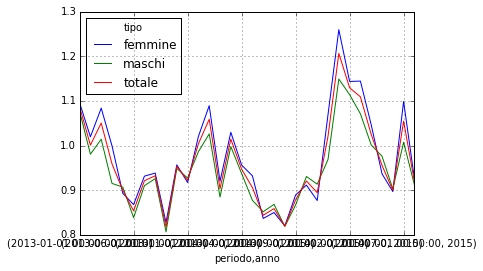

In [231]:
indice_mortalit.xs("Toscana", level='Regioni', axis=0).plot()

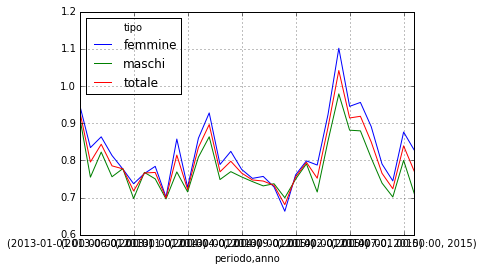

In [232]:
indice_mortalit.xs("Veneto", level='Regioni', axis=0).plot()

In [233]:
indice_mortalit = indice_mortalit.reset_index()#.apply(lambda x: x.month)

In [234]:
indice_mortalit["mese"] = indice_mortalit["periodo"].apply(lambda x: x.month)

In [245]:
indice_mortalit_2014 = indice_mortalit[indice_mortalit["anno"] == 2014]
indice_mortalit_2014.drop(["periodo", "anno"], inplace = True, axis = 1)
indice_mortalit_2015 = indice_mortalit[indice_mortalit["anno"] == 2015]
indice_mortalit_2015.drop(["periodo", "anno"], inplace = True,  axis = 1)

c:\Users\SANTECH\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\Users\SANTECH\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [248]:
indice_mortalit_var = indice_mortalit_2015.set_index(["Regioni", "mese"]) / indice_mortalit_2014.set_index(["Regioni", "mese"]) * 100 - 100

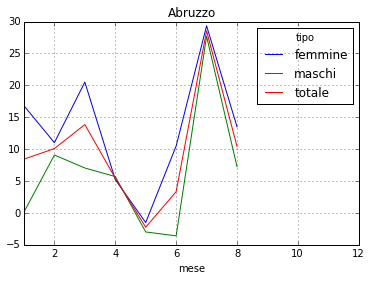

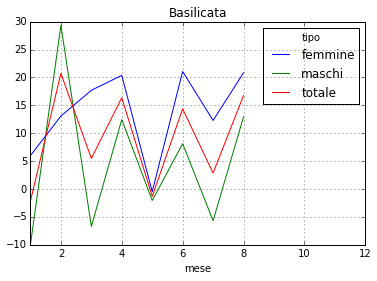

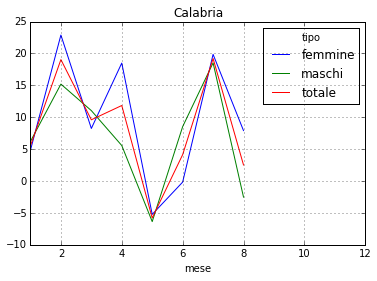

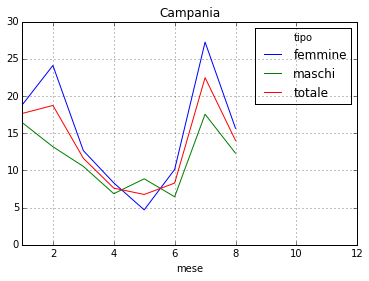

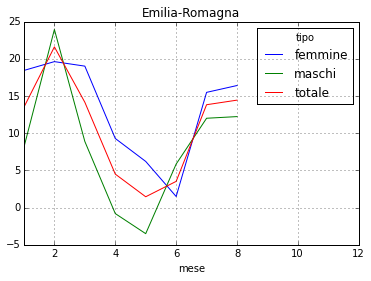

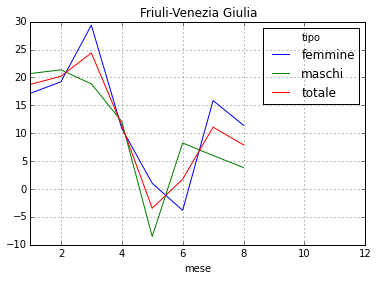

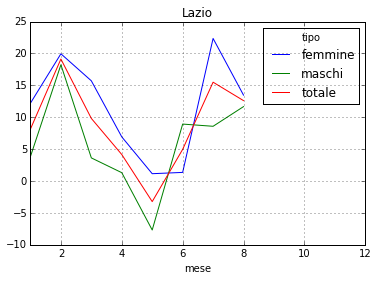

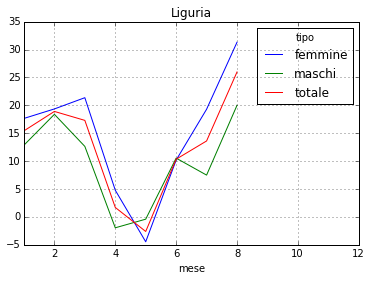

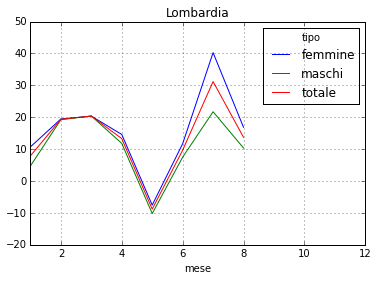

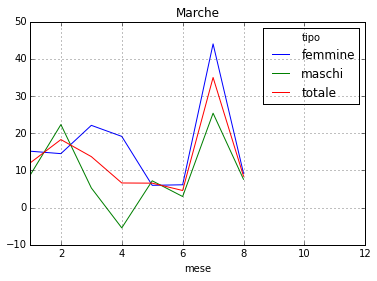

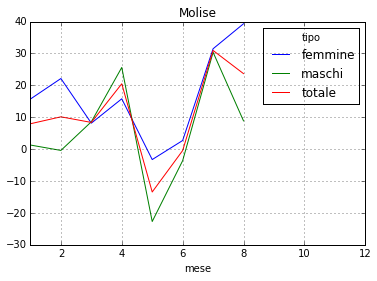

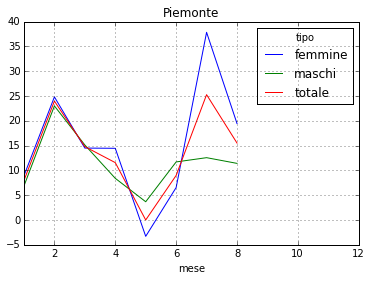

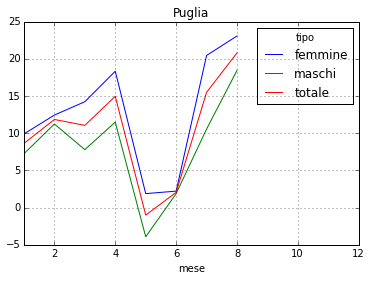

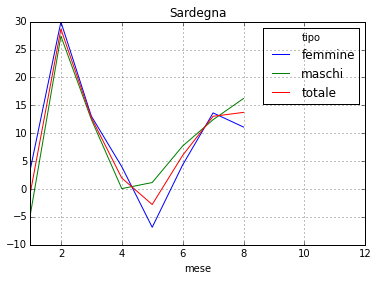

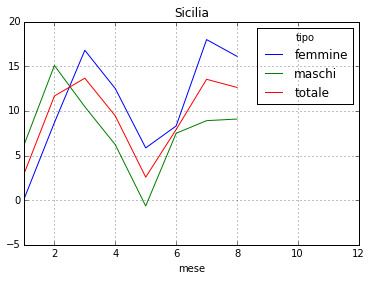

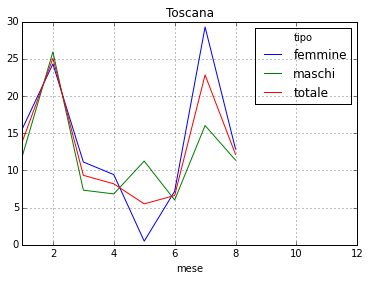

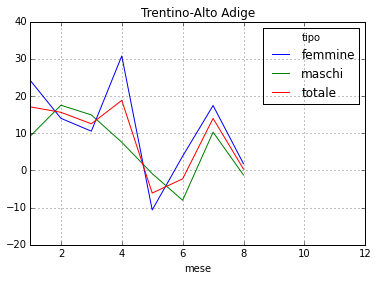

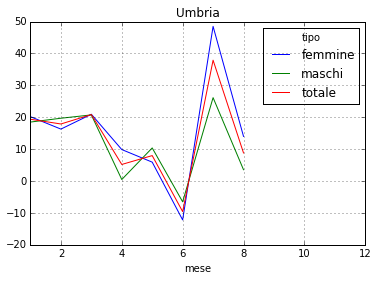

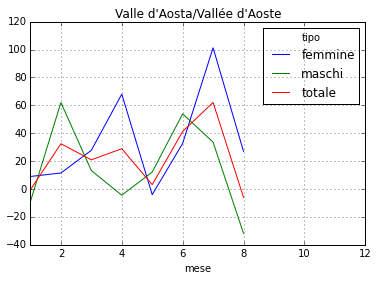

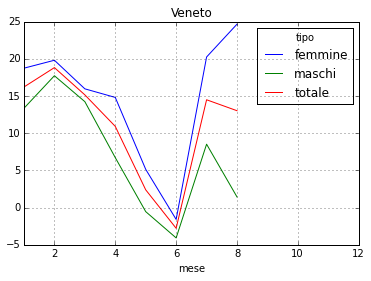

In [259]:
for regione in indice_mortalit_var.index.get_level_values('Regioni').unique(): 
    indice_mortalit_var.xs(regione, level='Regioni', axis=0).plot(title = regione)

array([u'Abruzzo', u'Basilicata', u'Calabria', u'Campania',
       u'Emilia-Romagna', u'Friuli-Venezia Giulia', u'Lazio', u'Liguria',
       u'Lombardia', u'Marche', u'Molise', u'Piemonte', u'Puglia',
       u'Sardegna', u'Sicilia', u'Toscana', u'Trentino-Alto Adige',
       u'Umbria', u"Valle d'Aosta/Vall\xe9e d'Aoste", u'Veneto'], dtype=object)